# 2023/24-XAI-LABS
Note that this lab has three levels: basic, regular and advanced.\
Doing the **basic** part earns you a grade of 5.5-6.0.\
Doing the **regular** part earns you a max grade of 8.\
Doing the **advanced** part earns you a max grade of 10.0.

Please return a Jupyter notebook as a submission in Canvas, to make the grading easier for us.

**Group No:** 9

**Student Name**: Wan Barmawi Muhammad Razaq S2819201

**Student Name**: Hakan Tirsi S3105555


#Lecture 2
The following set of exercises are related to the Lecture 1.
## Local Explanations: SHAP, LIME and Counterfactual Explanations

In this exercise we apply permutation feature importance to a real world dataset. We attempt is using two ways.
1. Using our own basic implmenattion of the algorithm
2. Using the exiting libraries

**Acknowledgement** : Some code is generated using chatgpt but it is tested for any errors.

In [26]:
# First of all import the required packages
# Load required libraries
#!pip install shap lime
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import shap
import lime
import lime.lime_tabular

We'll use the 'breast_cancer' dataset from 'sklearn.datasets', which is a binary classification problem.

In [27]:
# Load dataset
data =load_breast_cancer()
X=data.data
y=data.target

In [28]:
# Check feature_names using feature_names attribute
feature_names = data.feature_names

print("Feature Names:", feature_names)

class_names = data.target_names

print("Class Names:", class_names)

Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Class Names: ['malignant' 'benign']


Split data into train and test. Fix the random state seed and also use 20% for testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train a Model
One can use any classifier to train the model. Here we will use **random forest** classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
# Lets us check how well our model is doing
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



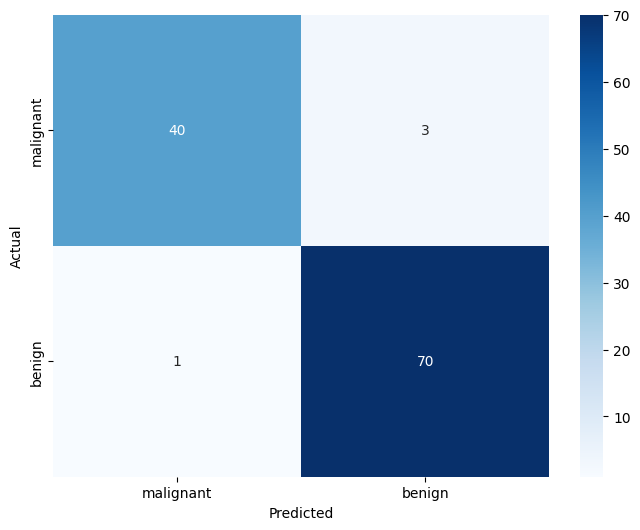

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn's heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

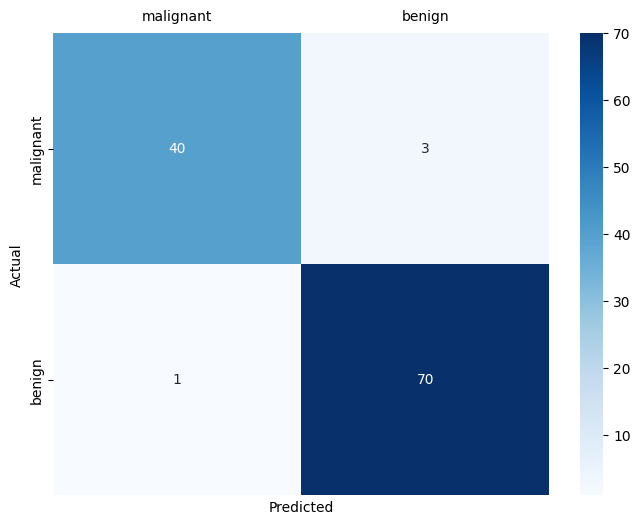

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.tick_params(axis='x', bottom=False, labelbottom=False, labeltop=True)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Let's also find the feature importance of the model:

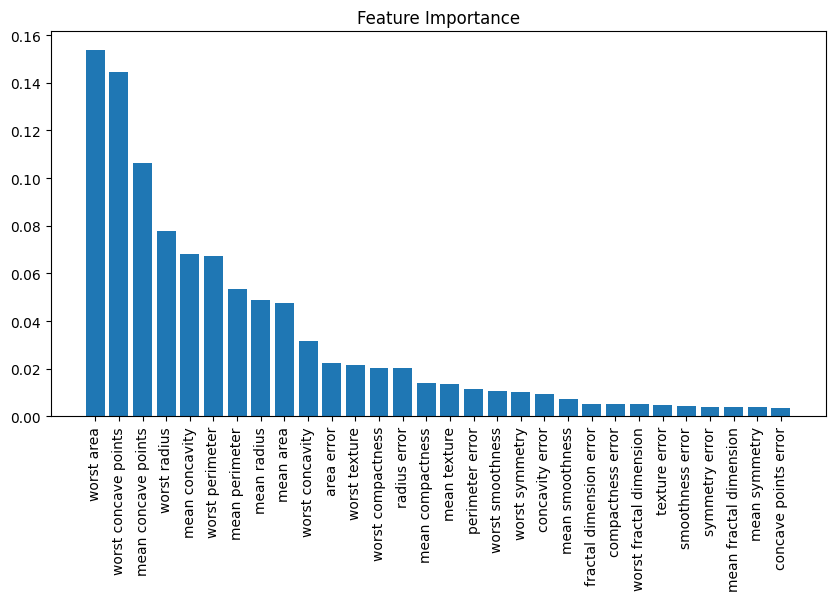

In [34]:
importances = clf.feature_importances_

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()


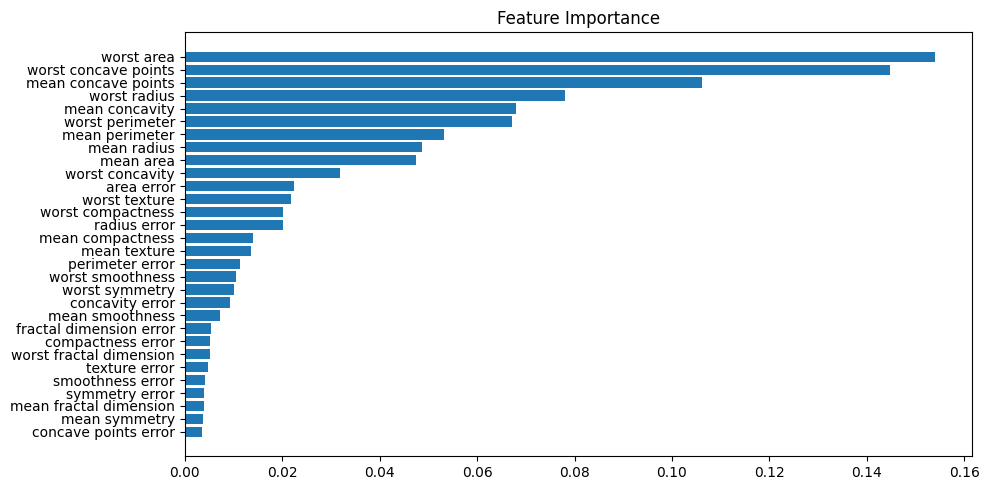

In [35]:
# Importances is a numpy array, we sort this array in Aescending order
indices = np.argsort(importances)
# We create a list, where the feature names gets combined with its value.
names = [data.feature_names[i] for i in indices]

#Creating A horizontal Barplot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), names)
plt.tight_layout()
plt.show()

## Exercise 1 (Basic): Feature Importance with SHAP

(a) Find one case for each of the situations TP, TN, FP, FN and use SHAP feature importance (global explanations) to explain the model's decisions for each case. Discuss the effectiveness of feature importance (summary plot, type="bar") in explaining these cases.  

Is the feature importance of shap (mean SHAP values) the same as the feature importance we got from the random 
forest model?


In [36]:
# Finding one example each for FP, FN, TP, TN
fp_index = None
fn_index = None
tp_index = None
tn_index = None

fp_found = False
fn_found = False
tp_found = False
tn_found = False

for i in range(len(y_test)):
    actual = y_test[i]
    predicted = y_pred[i]

    # False Positive (1 predicted, but actually 0)
    if predicted == 1 and actual == 0 and not fp_found:
        fp_index = i
        fp_found = True

    # False Negative (0 predicted, but actually 1)
    elif predicted == 0 and actual == 1 and not fn_found:
        fn_index = i
        fn_found = True

    # True Positive (1 predicted, actually 1)
    elif predicted == 1 and actual == 1 and not tp_found:
        tp_index = i
        tp_found = True

    # True Negative (0 predicted, actually 0)
    elif predicted == 0 and actual == 0 and not tn_found:
        tn_index = i
        tn_found = True

    # Break loop if all cases found
    if fp_found and fn_found and tp_found and tn_found:
        break

# Print indices for verification
print("FP Index:", fp_index)
print("FN Index:", fn_index)
print("TP Index:", tp_index)
print("TN Index:", tn_index)



FP Index: 20
FN Index: 8
TP Index: 0
TN Index: 1


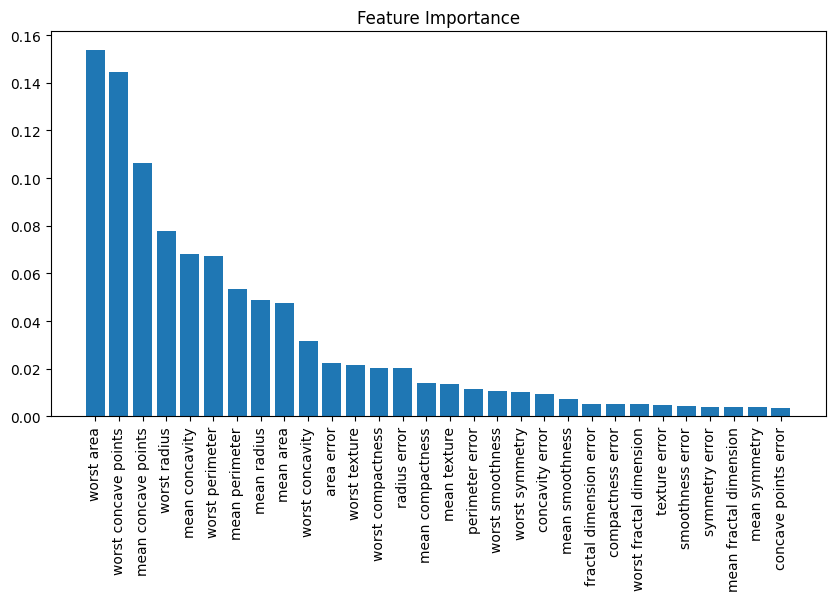

In [37]:
importances = clf.feature_importances_

import matplotlib.pyplot as plt
import numpy as np

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [data.feature_names[i] for i in indices]

# Create plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]), names, rotation=90)
plt.show()

In [38]:

# Create explainer (Method 1: using Kernel Shap, faster). ## you can go for for other options
f = lambda x: clf.predict_proba(x)[:,1]

#initilaize SHAP explainer with KernelExplainer
explainer = shap.KernelExplainer(f, X_train)
shap_values_clf = explainer.shap_values(X_test, nsamples=100) #you can increase the sample size if you want



# Continue from here

Using 455 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/114 [00:00<?, ?it/s]

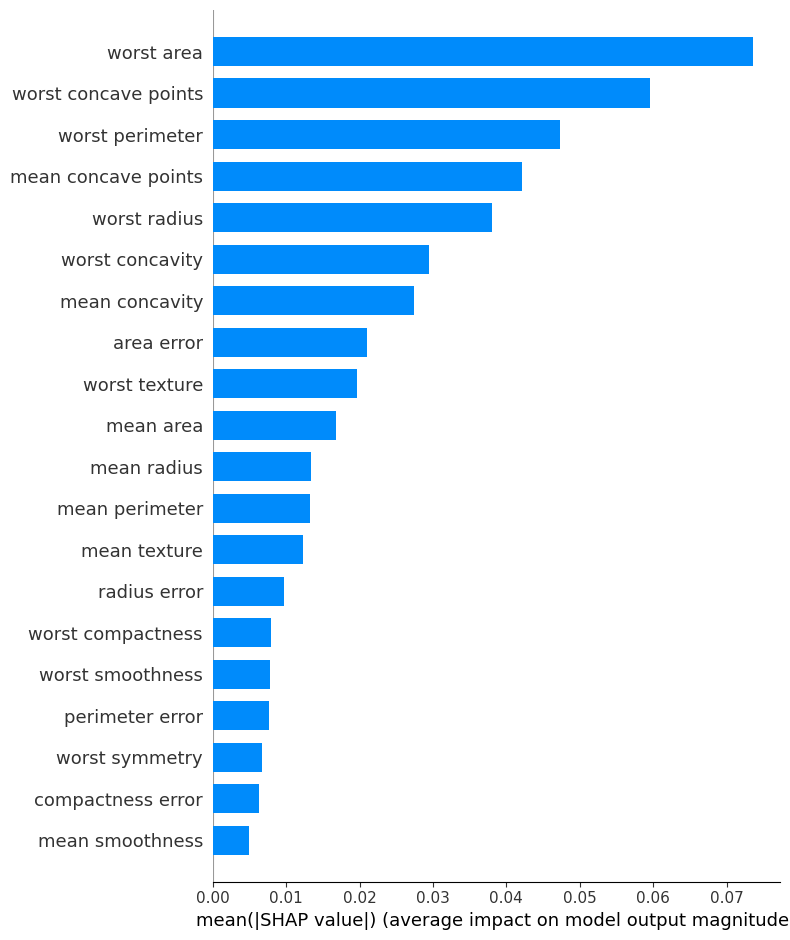

In [39]:
plot = shap.summary_plot(shap_values_clf,plot_type="bar", feature_names=data.feature_names, )

**Answer Excersise 1A**
(a) Find one case for each of the situations TP, TN, FP, FN and use SHAP feature importance (global explanations) to explain the model's decisions for each case. Discuss the effectiveness of feature importance (summary plot, type="bar") in explaining these cases.  

- With the help of feature importance, we get a general understanding of the most important features. However, what really made the model predict an data point as FP or FN is not clear. With the help of the feature importance plots, we can indicate which features could cause a model to predict a value.


Is the feature importance of shap (mean SHAP values) the same as the feature importance we got from the random forest model?
- The feature importance of SHAP is almostsimiliar as the feature importance from the random forest model. 
Both indicate that the worst area and worst concava points are the most important features. After these 2, there is some shuffle between the ranking of other features.

**(b)** Are the feature importance explanations sufficient for understanding the model's decisions in each case? How much can you explain each case using feature importance alone?

**Answer Excersise 1B**
Using feature importance alone, one can only indicate which features are the most important and also could influenced the decision making of the model. But this is a general understanding for the whole data set and it could occur that for some specific data points, other features where more important. Thus, the limitation of feature importance occurs when one would like to know how individual predictions were made. It only provides a global understanding.

## Exercise 2 (Basic): Local Explanations with SHAP
**(a)** Use SHAP local explanations (try out different plots) for each of the 4 cases to explain how the model decides about each case.

FP Index: 20
FN Index: 8
TP Index: 0
TN Index: 1

#### Index 8 False Negative

In [40]:
# Use this block to write your code
## for example you can use the code below for one of the cases
shap.initjs()
shap_values_single = explainer.shap_values(X_test[8,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test[8,:],feature_names=data.feature_names)

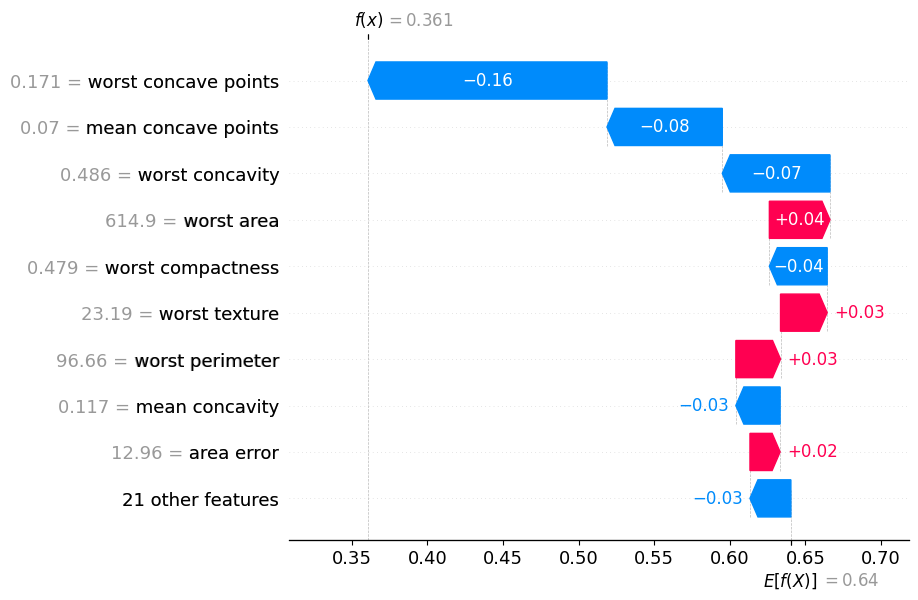

In [41]:
#Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values_single,
                                     base_values=np.mean(y_pred),
                                     data=X_test[8,:],feature_names=data.feature_names))

**Explaination FP 8**
From the waterfall plot and force plot, we can observe that the baseline average (E[f(X)]) was 0.64. Three most important features that pushed the prediction to a False Negative were: Worst Concave points, Mean concave points and worst concavity. However, worst area, worst compactness and worst texture pushed the the datapoint to the right direction but not enough.

#### Index 0 True Positive

In [42]:
shap_values_single = explainer.shap_values(X_test[0,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, X_test[0,:], feature_names= data.feature_names)



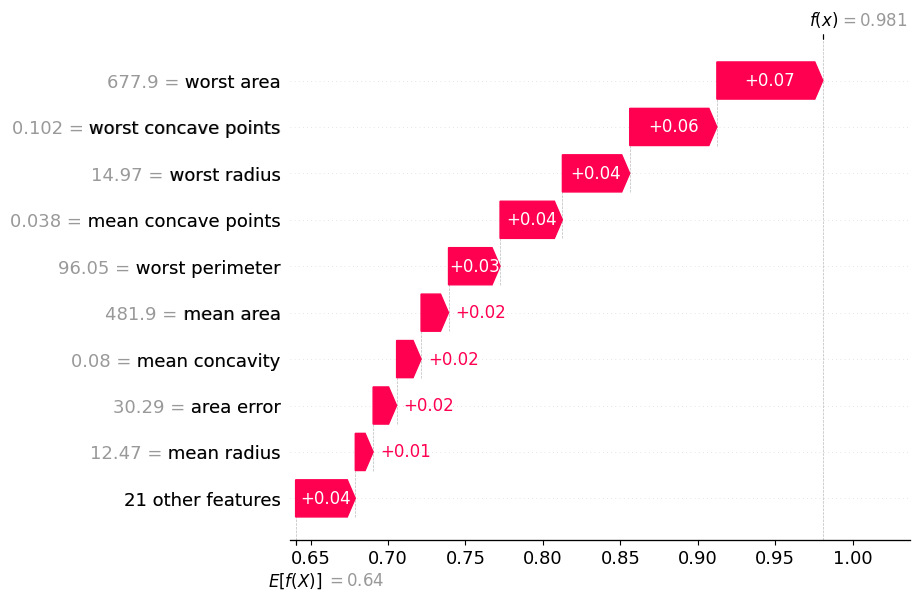

In [43]:
shap_values_single = explainer.shap_values(X_test[0,:], nsamples=100)
shap.waterfall_plot(shap.Explanation(values=shap_values_single,
                                     base_values=np.mean(y_pred),
                                     data=X_test[0,:],feature_names=data.feature_names))

Explaination TP 0

In this datapoint, all features contributed to the prediction.

#### Index 1 True Negative

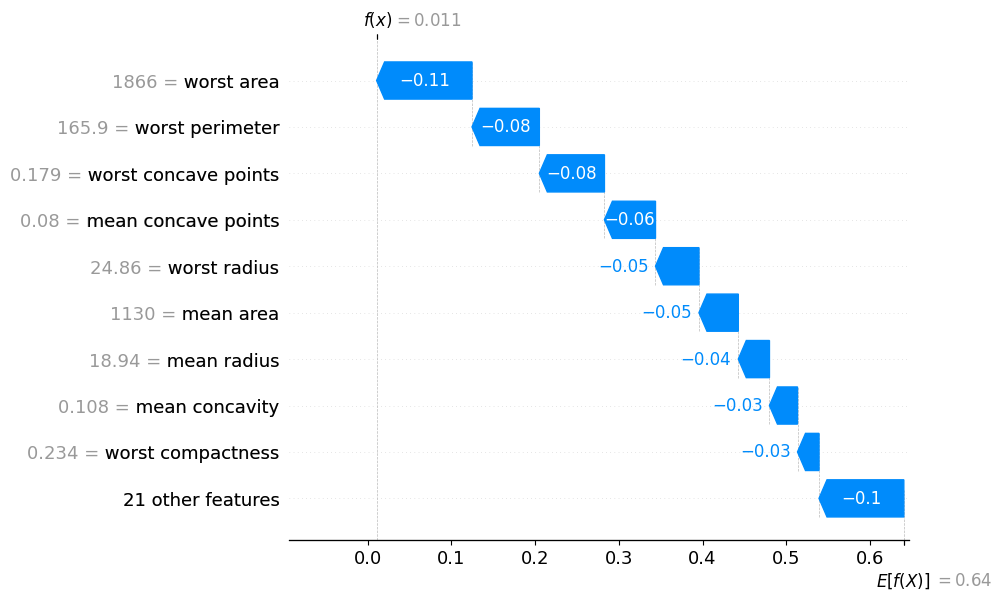

In [44]:
shap_values_single = explainer.shap_values(X_test[1,:], nsamples=100)
shap.waterfall_plot(shap.Explanation(values=shap_values_single,
                                     base_values=np.mean(y_pred),
                                     data=X_test[1,:],feature_names=data.feature_names))

Explaination TN 1

In this datapoint, all features contributed to the prediction.

#### Index 20 False Positive

In [45]:
shap_values_single = explainer.shap_values(X_test[20,:], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values_single, features=X_test[20,:], feature_names=data.feature_names)

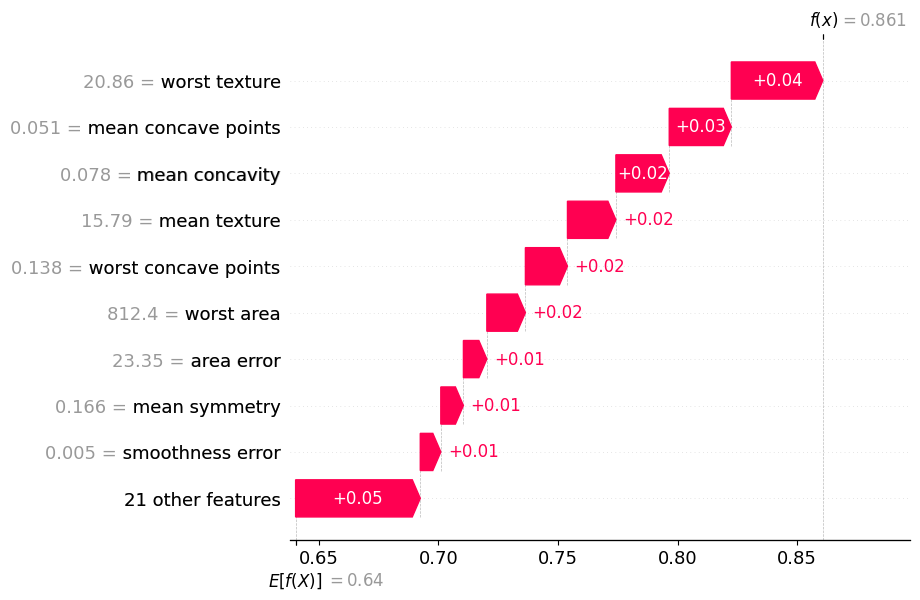

In [46]:
shap_values_single = explainer.shap_values(X_test[20,:], nsamples=100)
shap.waterfall_plot(shap.Explanation(values=shap_values_single,
                                     base_values=np.mean(y_pred),
                                     data=X_test[20,:],feature_names=data.feature_names))


Explaination FP 20

From both plots we can observe that the baseline value was around 0,63. Furthermore, all features pushed the model to the right resulting in a False Positive.

**Ask teacher about also using other plots, now not able to achieve.**

**(b)** Write down your explanations in words (natural language) for the FP case based on the SHAP local explanations.

**2b Answer:**
For the FP case (index 20), It predicted Malignant while it should be Benign.
Based on the SHAP force and waterfall plot, we see that all features (except 1) pushed the prediction to the wrong side. *Worst texture*, *worst concava points* and *worst area*,
were the features that contributed the most to this prediction. These features have also a similiar importance in the global feature importance plot, except *worst texture* feature. This feature did appeard in a lower rank in the Global Feature Importance plot. Moreover, in the Force and waterfall plots for the TP data point, this *worst texture* feature did not appear as a significant feature. Thus the combination of  *Worst texture*, *worst concava points* and *worst area* could perhaps result in a wrong classification. But to verify the later statement, we would needed more FP and compare their most important features.





**(c)** Are the explanations of Lime and SHAP different?

**2C Answer:**

The explanations of Lime and SHAP are a bit similiar. For example the FP datapoint. Both indicate that the *worst texture* feature contributed the most. After this main feature, the methods differ about ranking other features. For Lime, the second most important feature was *mean texture* while for SHAP it was *worst concave points*. 

## Exercise 3 (Basic) Local Interpretable Model-Agnostic Explanations (LIME)

(a) Use LIME approach to explain the 4 cases (TP,TN, FP, FN)

algorithm:
1. Initialize LIME Explainer
2. Select Instances for Explanation
   - Retrieve Indices
   - Select Instances from X_test
3. Generate explanations with LIME
    - Generate pertubed samples (done internally by the lime library)
    - Fit Local Model
    - Get Explanation Weights

   
   

**Answer:**

In [47]:
import lime.lime_tabular
import numpy as np


# Initialize LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, mode='classification', feature_names=data.feature_names)

# 2. Select instances for explanation

# Select Instances from X_test
FP_instance = X_test[fp_index]
FN_instance = X_test[fn_index]
TP_instance = X_test[tp_index]
TN_instance = X_test[tn_index]

# 3. Generate Explanation

# Define a function that takes in a batch of inputs and outputs prediction (probability)
def model_predict(data_input):
    return clf.predict_proba(data_input)

# Generate explanations for each instance
explanation_fp = explainer.explain_instance(FP_instance, model_predict, num_features=10)
explanation_fn = explainer.explain_instance(FN_instance, model_predict, num_features=10)
explanation_tp = explainer.explain_instance(TP_instance, model_predict, num_features=10)
explanation_tn = explainer.explain_instance(TN_instance, model_predict, num_features=10)

# Visualizations (the same as before)
explanation_fp.show_in_notebook(show_table=True, show_all=False)
explanation_fn.show_in_notebook(show_table=True, show_all=False)
explanation_tp.show_in_notebook(show_table=True, show_all=False)
explanation_tn.show_in_notebook(show_table=True, show_all=False)



**(b)** Write down your explanations in words (natural language) for the FP case based on the LIME explanations.

**Answer**

In this instance, the model incorrectly predicted the outcome as positive (the cancers are benignt when they were actually malignant). The following are the breakdown of how different features influence this model decision:

1. Worst Texture (20.86) : Knowing that the feature value of 20.86 falls just below the threshold of 21.05, Worst Texture is pushing the prediction (0.06) towards the positive class (indicating cancer)
2. Mean Texture (15.79) : this feature also supported positive prediction (0.04), even though with a smaller impact compared to 'wors texture'.
3. Worst Compactness (0.35), mean concavity(0.08), worst concavity(0.28), worst radius (23.35) : These features contribute to the negative prediction which equals to 0.02 , 0.02, 0.01 respectively. 
4. Worst concave points(0.14), worst symetry (0.26), area error(23.35): These features also pushed the prediction towards a positive outcome (0.1).

In summary, the model's false positive prediction appears to be heavily influenced by texture-related features (worst texture, and mean texture) which had the strongest impacts. This explanation suggests that the model may be overemphasizing these features that lead to an incorrect classification in this instance.

## Exercise 4 (Regular): Local Surrogate Model Using Tree

(a) Implement a method to find a sample around a given case/point \( X \) in an epsilon neighborhood, to build a dataset to train a surrogate model. Give this sample to the model \( f \) to be explained, and consider the output \( f(X) \) as the target output in your built dataset. Train a decision tree on this dataset, creating a surrogate decision tree (g) that attempts to learn how \( f \) decides locally around \( X \). Control the depth of the tree to keep it simple. Assuming the decision tree is explainable, we could somehow explain how the model works for instance \( X \) using the structure of the tree and the the importance of feature in this tree.


# algorithm
1. Generate samples around a given instance X within an epsilon neighborhood.
2. Use these samples to obtain predictions from the complex model f
3. Train a decision tree as a surrogate model g on this data.

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

def train_surrogate_model(X, model, epsilon, num_samples=100, tree_depth=3):
    """
    Trains a surrogate decision tree model around a given instance X using predictions from a complex model.
    
    Parameters:
        X (np.array): The instance that we want to build the surrogate model.
        model (estimator): The complex model, whose decisions are to be explained. In this case is RandomForest.
        epsilon (float): The neighborhood radius within which to sample.
        num_samples (int): The number of samples to generate in the neighborhood.
        tree_depth (int): The maximum depth of the decision tree.
        
    Returns:
        A trained decision tree surrogate model.
    """
    # Generate pertubed sample in the epsilon neighborhood
    pertubed_samples = X + np.random.normal(0, epsilon, size=(num_samples, X.shape[0]))
    pertubed_samples = np.clip(pertubed_samples, X.min(), X.max())
    
    # Obtain predictions from the complex class
    probabilities = model.predict_proba(pertubed_samples)[:, 1] # Binary classification, and interest in the second class.
    predictions = (probabilities > 0.5).astype(int) # to convert probability to 0 or 1 based on the threshold 0.5
    
    # Train the decision tree surrogate model
    surrogate_model = DecisionTreeClassifier(max_depth=tree_depth)
    surrogate_model.fit(pertubed_samples, predictions)
    
    return surrogate_model


(b) Use your method to explain the 4 cases that you have.

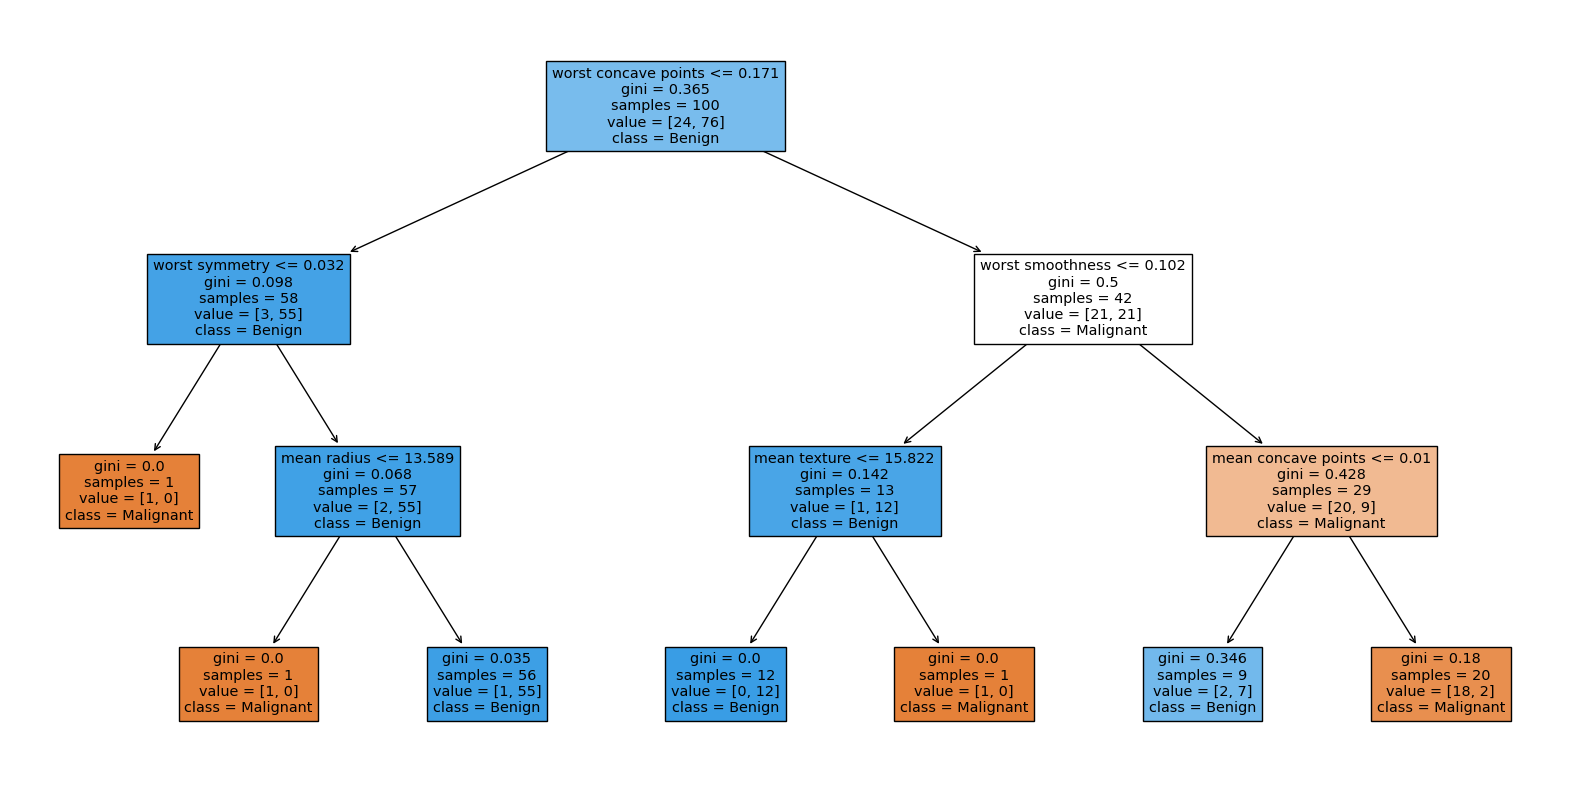

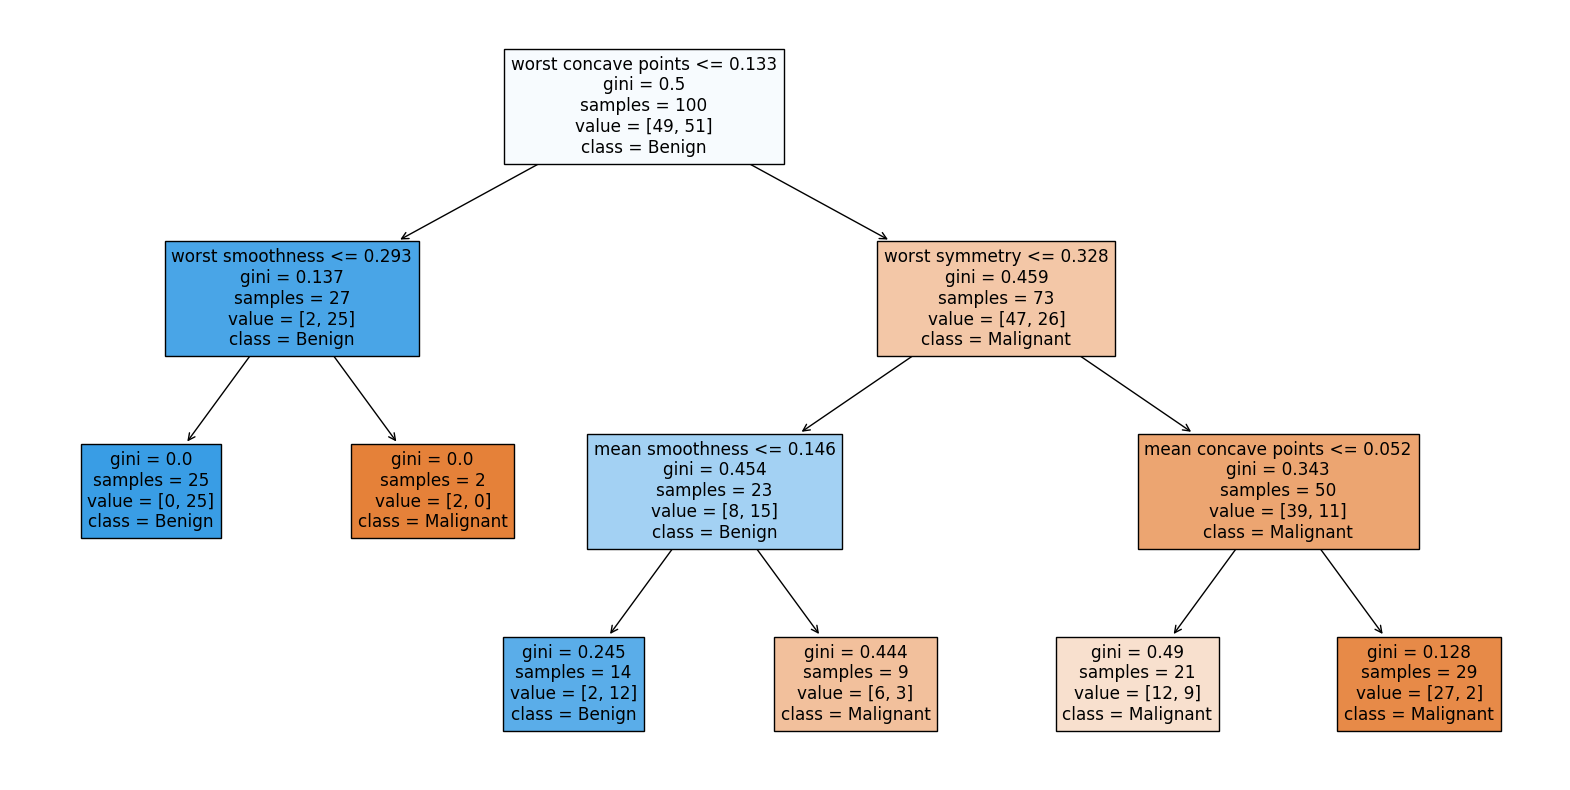

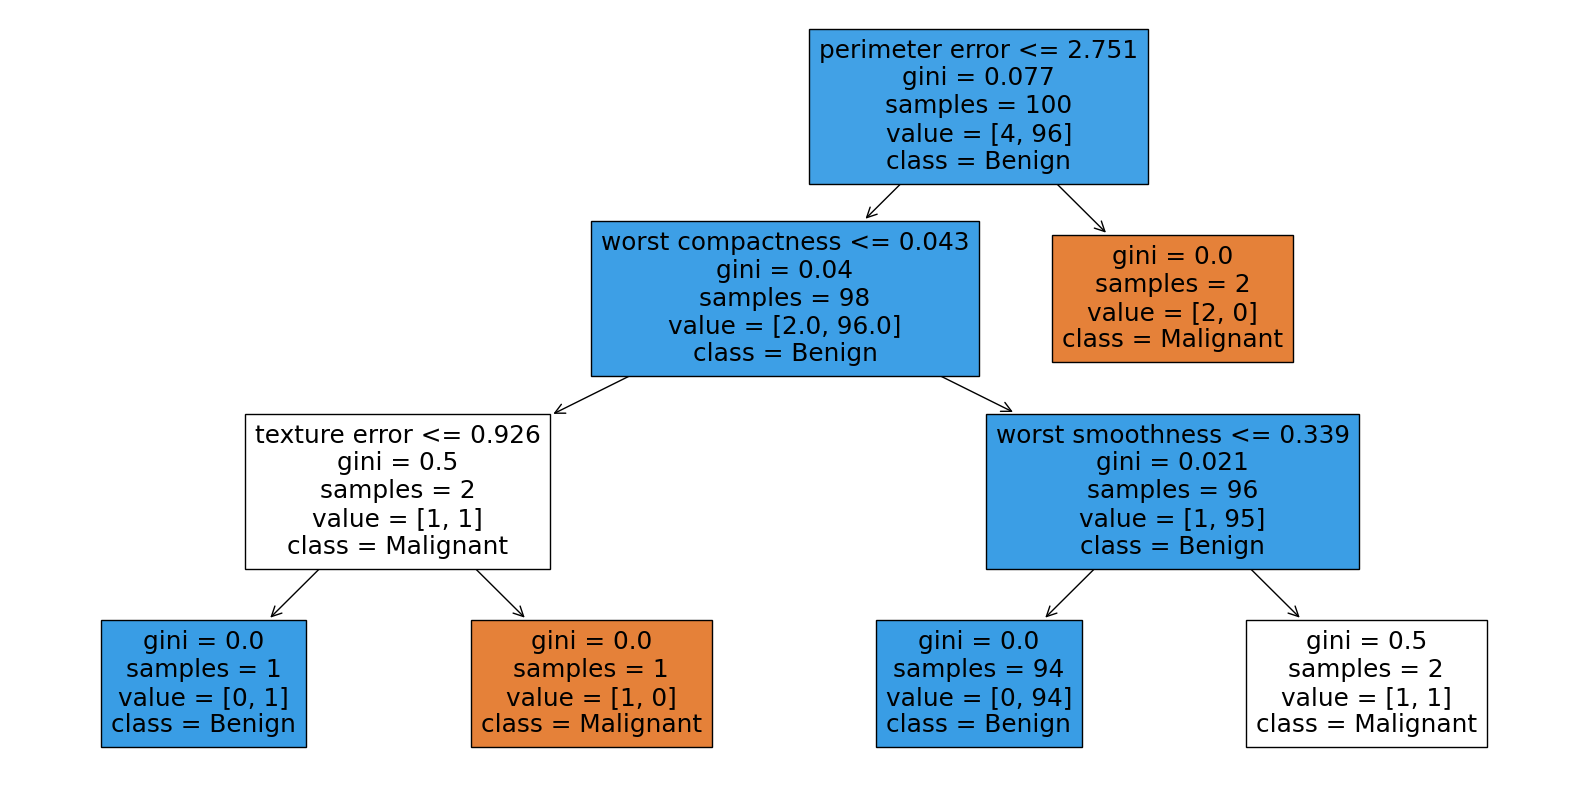

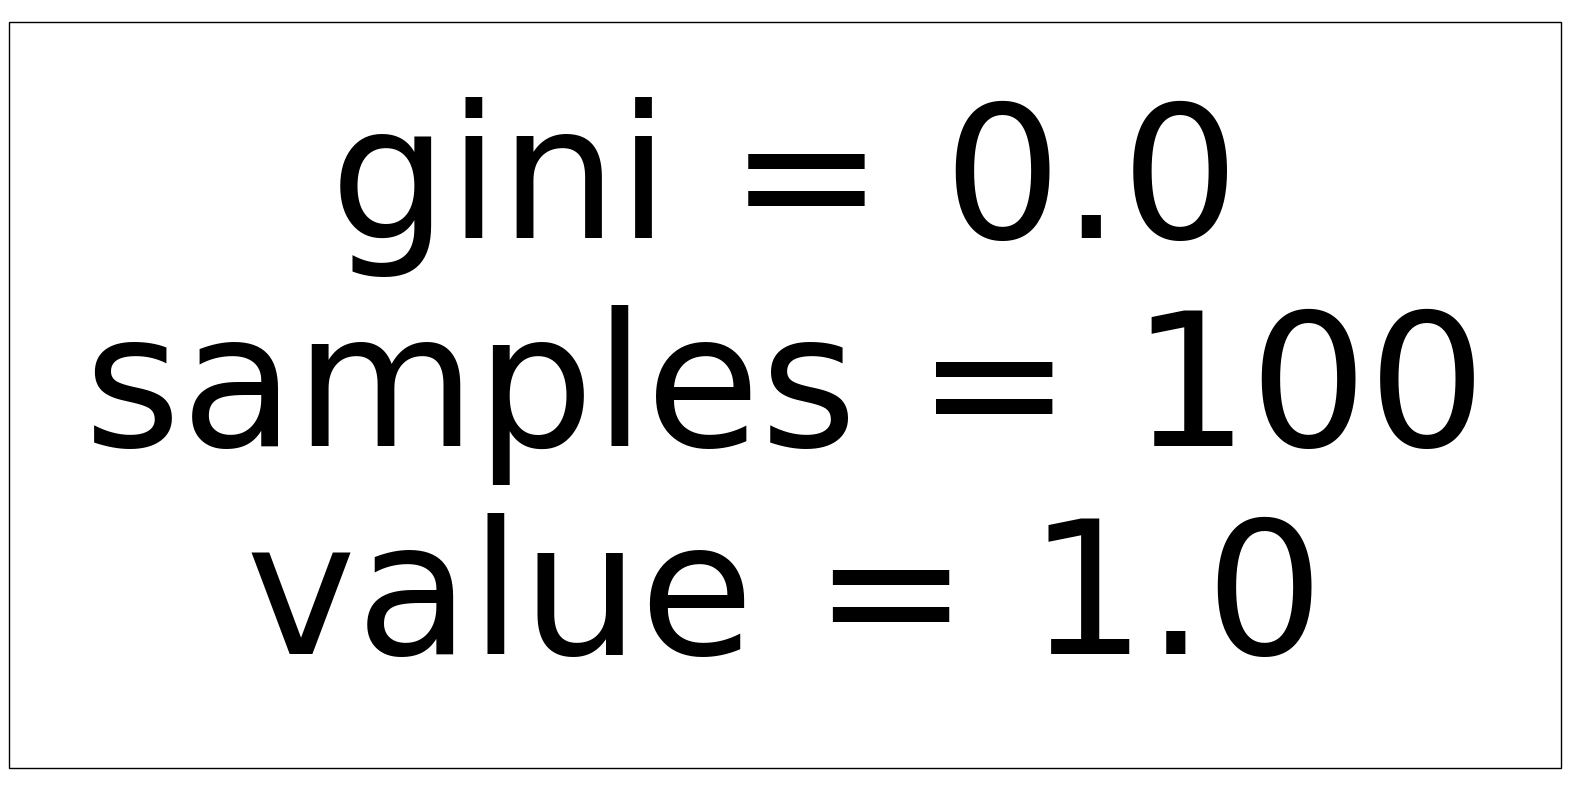

In [49]:
surrogate_model_fp = train_surrogate_model(FP_instance, clf, epsilon=0.1, num_samples=100, tree_depth=3)
surrogate_model_fn = train_surrogate_model(FN_instance, clf, epsilon=0.1, num_samples=100, tree_depth=3)
surrogate_model_tp = train_surrogate_model(TP_instance, clf, epsilon=0.1, num_samples=100, tree_depth=3)
surrogate_model_tn = train_surrogate_model(TN_instance, clf, epsilon=0.1, num_samples=100, tree_depth=3)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(surrogate_model_fp, filled=True, feature_names=data.feature_names, class_names=['Malignant', 'Benign'])
plt.show()

plt.figure(figsize=(20,10))
plot_tree(surrogate_model_fn, filled=True, feature_names=data.feature_names, class_names=['Malignant', 'Benign'])
plt.show()

plt.figure(figsize=(20,10))
plot_tree(surrogate_model_tp, filled=True, feature_names=data.feature_names, class_names=['Malignant', 'Benign'])
plt.show()

plt.figure(figsize=(20,10))
plot_tree(surrogate_model_tn, filled=True, feature_names=data.feature_names, class_names=['Malignant', 'Benign'])
plt.show()




(c) How do you choose epsilon? What considerations should be taken into account when determining the size of the sample?

**Choosing Epsilon**
1. Scale of Features:
- Normalization/Standardization: Features should be normalized or standardized to ensure that they are on a comparable scale, which is important when using metrics like Euclidean distance. 
-Relative Magnitude: The chosen should be relative to the scale of the features. Too large an may capture irrelevant data points, skewing the local model, while too small an may not encapsulate enough variability to be informative.

2. Complexity of the model
- HIghly non linear model : a smaller epsilon is preferable to more accurately reflect local decision making
- Simpler model : large epsilon maybe sufficient.

3. Data density and distribution
- Data Sparsity: if the data are sparsed, choose large e
- Data density: in a dense areas, choose a smaller e.

**Choosing the sample size**
- Large sample provide more stable and accurate estimates of the model local behaviour.
- Consider available computational resources
- In higher-dimensional spaces, consider reducing dimensionality to effectively sample the neighborhood without requiring much of unnecessary samples.
- Larger samples allows the surrogate model to generalize better within the defined neighborhood.

**Answer**

## Exercise 5 (Advanced): Counterfactual Instances
(a) Try to find counterfactual instances for the FP case. You are free to think about the ways you can find a few counterfactual cases where the outcome of the model is opposite (negative). The counterfactual points should satisfy the following properties:

Validity: The counterfactuals' predicted outcome is different from the original outcome.

Proximity: The counterfactuals should be similar to the query instance.

Sparsity: The counterfactuals should not require changing too many covariates.

Diversity: The counterfactuals should be different from one another.

Put some comments on your code to show the algorithm steps.

In [50]:
# Import Necessary libraries
import dice_ml
from dice_ml.utils import helpers

# Convert the sklearn dataset to a pandas Dataframe to use with DICE
import pandas as pd
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Convert training data to DataFrame (Dice expect the data with features name include, so retrain the data to DataFrame)
X_train_df = pd.DataFrame(X_train, columns=data.feature_names)
y_train_df = pd.Series(y_train, name='target')

# Retrain the RandomForestClassifier using DataFrame with feature names
clf.fit(X_train_df, y_train_df)

# Dice expect a continous features, so ensure that we explicitly passed a list
continuous_features_list = list(data.feature_names)

# Create a Dice data object
d = dice_ml.Data(dataframe=df, continuous_features=continuous_features_list, outcome_name='target')

# Creating a model object
backend = 'sklearn' #using sklearn backend
m = dice_ml.Model(model=clf, backend=backend)

# Create DiCe explanation instance
exp = dice_ml.Dice(d, m)

# Now back to the question, Generate counterfactuals for the False Positive Instance

# Select the FP instance for which to generate counterfactuals
query_instance = df.drop(columns=['target']).iloc[[fp_index]]

# Generate counterfactuals explanations
cf = exp.generate_counterfactuals(query_instance, total_CFs=5, desired_class='opposite')

# Visualize the counterfactuals
cf.visualize_as_dataframe(show_only_changes=True)

ModuleNotFoundError: No module named 'dice_ml'

**Answer:**